<a href="https://colab.research.google.com/github/bundickm/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_223_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [58]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

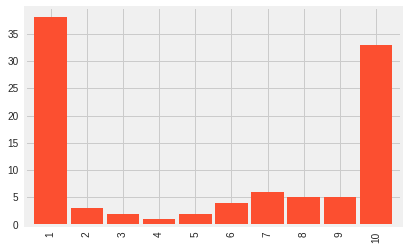

In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.clf()

plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

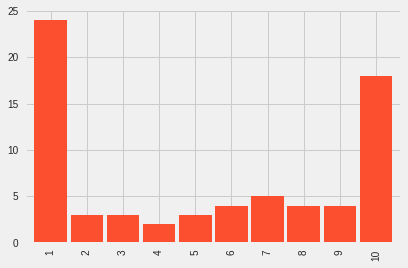

In [60]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

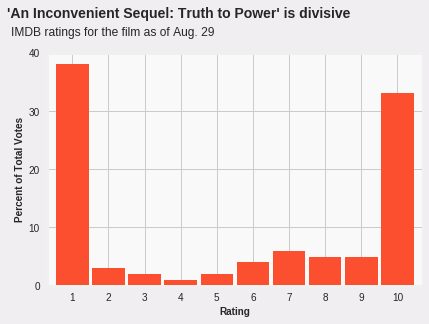

In [61]:
plt.style.use('fivethirtyeight')
fig = plt.figure()

fake = pd.Series([38,3,2,1,2,4,6,5,5,33], index=range(1,11))

ax = fake.plot.bar(color='C1', width=.9)
fig.patch.set_facecolor('#F0EEF1')

ax.set(yticks=range(0,50,10), facecolor='#f9f9f9')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')


ax.text(x=-1.8,y=46, s="'An Inconvenient Sequel: Truth to Power' is divisive", fontsize=14, fontweight='bold');
ax.text(x=-1.7, y=43, s='IMDB ratings for the film as of Aug. 29', fontsize=12);
ax.tick_params(labelrotation=0)

## Reproduce with real data

In [0]:
pd.set_option('display.max_columns',500)
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [63]:
df.shape

(80053, 27)

In [64]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
df = df.set_index('timestamp')

In [0]:
lastday = df[df['category'] == 'IMDb users']['2017-08-29']

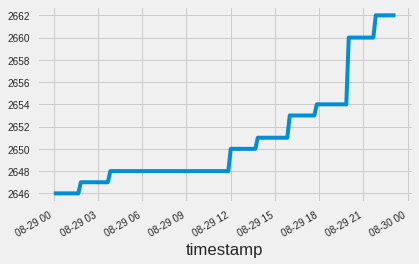

In [68]:
lastday['respondents'].plot();

In [69]:
final = lastday.tail(1)
final

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [70]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct', '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


<Figure size 432x288 with 0 Axes>

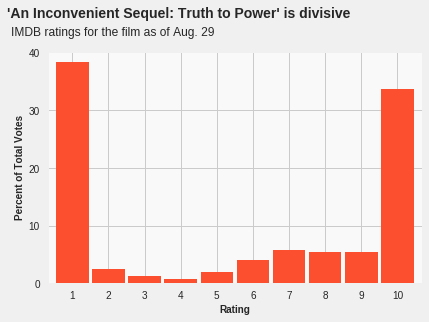

In [71]:
plt.style.use('fivethirtyeight')
fig = plt.figure()
fig.set_facecolor('#ef7030')

data = final[pct_columns].T
data.index = (range(1,11))

ax = data.plot.bar(color='C1', width=.9)
ax.get_legend().remove()

ax.set(yticks=range(0,50,10), facecolor='#f9f9f9')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')


ax.text(x=-1.8,y=46, s="'An Inconvenient Sequel: Truth to Power' is divisive", fontsize=14, fontweight='bold');
ax.text(x=-1.7, y=43, s='IMDB ratings for the film as of Aug. 29', fontsize=12);
ax.tick_params(labelrotation=0)

##Altair

In [72]:
import altair as alt
from vega_datasets import data

source = data.movies.url

alt.Chart(source).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=True),
    y='count()',
)

Chart({
  data: 'https://vega.github.io/vega-datasets/data/movies.json',
  encoding: EncodingWithFacet({
    x: X({
      bin: True,
      shorthand: 'IMDB_Rating:Q'
    }),
    y: Y({
      shorthand: 'count()'
    })
  }),
  mark: 'bar'
})

In [73]:
import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Horsepower', 'Acceleration', 'Miles_per_Gallon'],
    column=['Miles_per_Gallon', 'Acceleration', 'Horsepower']
).interactive()

RepeatChart({
  repeat: Repeat({
    column: ['Miles_per_Gallon', 'Acceleration', 'Horsepower'],
    row: ['Horsepower', 'Acceleration', 'Miles_per_Gallon']
  }),
  spec: Chart({
    data:      Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
    0            12.0          8         307.0       130.0              18.0   
    1            11.5          8         350.0       165.0              15.0   
    2            11.0          8         318.0       150.0              18.0   
    3            12.0          8         304.0       150.0              16.0   
    4            10.5          8         302.0       140.0              17.0   
    5            10.0          8         429.0       198.0              15.0   
    6             9.0          8         454.0       220.0              14.0   
    7             8.5          8         440.0       215.0              14.0   
    8            10.0          8         455.0       225.0              14.0   
    9             8.5          8         390.0       190.0              15.0   
    10           17.5          4         133.0       115.0               NaN   
    11           11.5          8         350.0       165.0               NaN   
    12           11.0          8         351.0       153.0               NaN   
    13           10.5          8         383.0       175.0               NaN   
    14           11.0          8         360.0       175.0               NaN   
    15           10.0          8         383.0       170.0              15.0   
    16            8.0          8         340.0       160.0              14.0   
    17            8.0          8         302.0       140.0               NaN   
    18            9.5          8         400.0       150.0              15.0   
    19           10.0          8         455.0       225.0              14.0   
    20           15.0          4         113.0        95.0              24.0   
    21           15.5          6         198.0        95.0              22.0   
    22           15.5          6         199.0        97.0              18.0   
    23           16.0          6         200.0        85.0              21.0   
    24           14.5          4          97.0        88.0              27.0   
    25           20.5          4          97.0        46.0              26.0   
    26           17.5          4         110.0        87.0              25.0   
    27           14.5          4         107.0        90.0              24.0   
    28           17.5          4         104.0        95.0              25.0   
    29           12.5          4         121.0       113.0              26.0   
    ..            ...        ...           ...         ...               ...   
    376          18.6          4         112.0        88.0              27.0   
    377          18.0          4         112.0        88.0              34.0   
    378          16.2          4         112.0        85.0              31.0   
    379          16.0          4         135.0        84.0              29.0   
    380          18.0          4         151.0        90.0              27.0   
    381          16.4          4         140.0        92.0              24.0   
    382          20.5          4         151.0         NaN              23.0   
    383          15.3          4         105.0        74.0              36.0   
    384          18.2          4          91.0        68.0              37.0   
    385          17.6          4          91.0        68.0              31.0   
    386          14.7          4         105.0        63.0              38.0   
    387          17.3          4          98.0        70.0              36.0   
    388          14.5          4         120.0        88.0              36.0   
    389          14.5          4         107.0        75.0              36.0   
    390          16.9          4         108.0        70.0              34.0   
    391          15.0          4          91.0        6

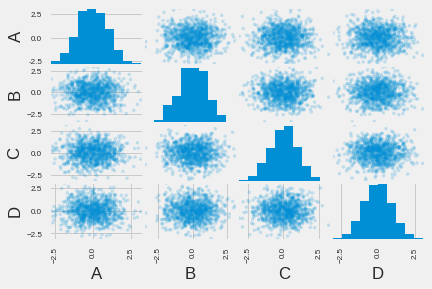

In [74]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
pd.plotting.scatter_matrix(df, alpha=0.2);

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [109]:
url = 'https://fivethirtyeight.com/wp-content/uploads/2018/01/rakich-resignations-11.png?w=1024'
example = Image(url=url, width=400)

display(example)

In [0]:
congress = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/congress-resignations/congressional_resignations.csv')

In [111]:
congress.shape

(615, 8)

In [112]:
congress.head()

,Member,Party,District,Congress,Resignation Date,Reason,Source,Category
0,Pat Tiberi,R,OH-12,115th,1/15/2018,Took a job with the Ohio Business Roundtable,New York Times,D
1,Al Franken,D,MN-SEN,115th,1/2/2018,Sexual harassment/groping/unwanted kissing,Minneapolis Star Tribune,X
2,Trent Franks,R,AZ-08,115th,12/8/2017,Sexual harassment/surrogacy pressure,CNN,X
3,John Conyers,D,MI-13,115th,12/5/2017,Sexual harassment/inappropriate touching,Washington Post,X
4,Tim Murphy,R,PA-18,115th,10/21/2017,Extramarital affair/abortion hypocrisy,POLITICO,A


In [113]:
congress['Category'].value_counts()

C        357
G         87
D         50
B         30
I         20
E         15
H         13
F         10
X          8
A          8
B & E      3
D & E      2
F & G      2
D & F      2
E & F      2
B & G      1
C & F      1
B & D      1
B & C      1
E & G      1
D & G      1
Name: Category, dtype: int64

In [0]:
resigs = pd.crosstab(index=congress['Congress'],columns=congress['Category'])

In [0]:
resigs.index = resigs.index.str.strip('thstrdnd').astype(int)

In [0]:
col_map = {'X':'Unwanted sexual contact',
           'A':'Consensual sex scandals',
           'B':'Other scandals',
           'C':'Other office',
           'D':'Private sector',
           'E':'Health/family',
           'F':'Other',
           'G':'Left early',
           'H':'Military service',
           'I':'Election overturned'}
resigs = resigs.rename(columns=col_map)

Text(24, 22, 'World War II')

<Figure size 720x432 with 0 Axes>

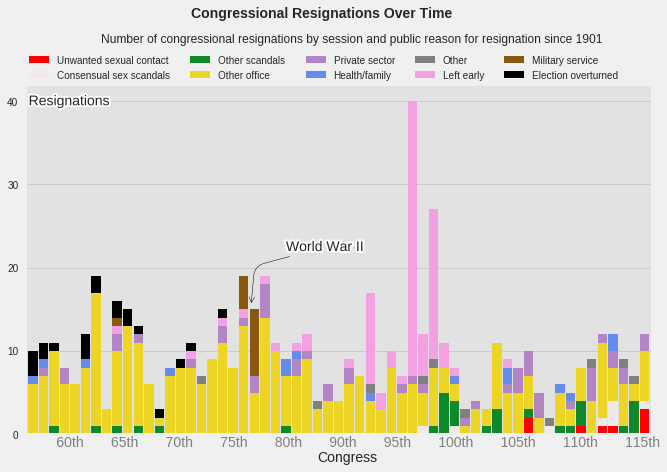

In [283]:
import matplotlib.patheffects as pe

#The rest is just nitpicky items - reassigning colors, adding the other annotations, adding path effects
plt.style.use('fivethirtyeight')
fig = plt.figure()
fig.set_facecolor('grey')
plt.rcParams['figure.figsize']=(10,6)

ax = resigs[list(col_map.values())].sort_index().plot(kind='bar', stacked=True, width=.9, color=['red','#f2e8e8','#0d892c','#edd525','#b285c4','#658ced','grey','#f2a2e2','#89570d','black']);

ax.set(xticks=[],yticks=range(0,50,10), facecolor='#E2E2E2')
ax.tick_params(labelrotation=0)
plt.xlabel('')
ax.legend(loc=(0,1), ncol=5)

ax.text(x=15,y=50, s="Congressional Resignations Over Time", fontsize=14, fontweight='bold');
ax.text(x=6.5, y=47, s='Number of congressional resignations by session and public reason for resignation since 1901', fontsize=12);
ax.text(x=0,y=-1.5,s='      60th       65th       70th       75th       80th       90th       95th       100th       105th       110th       115th', color='grey')
ax.text(x=27,y=-3.3,s="Congress")
# ax.text(x=-.4,y=39.5, s="Resignations",color='white',fontsize=13.5, weight='bold')
ax.text(x=-.4,y=39.5, s="Resignations",path_effects=[pe.withStroke(linewidth=4, foreground="white")])

ax.annotate('World War II', xytext=(24,22), xy=(20.7,15.5),arrowprops=dict(arrowstyle='->',color='-1',connectionstyle="angle,angleA=15,angleB=85,rad=10"), path_effects=[pe.withStroke(linewidth=4, foreground="white")])